# Final Project: Data Analysis Coursera
Olatoye Dolapo 24/05/2022:

I enjoyed my time as a Data Analyst at King County Real Estate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Data Set Importation
Load the csv:

In [3]:
King_County_Data='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(King_County_Data)

#    

*Let's view the first five columns of the dataframe:*

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df.drop(columns= ["id","Unnamed: 0"],inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#   

# Data Cleaning/Wrangling

Remove all NaN values to Avoid Value Error during the model training

In [48]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [49]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [50]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [51]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis

In [11]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

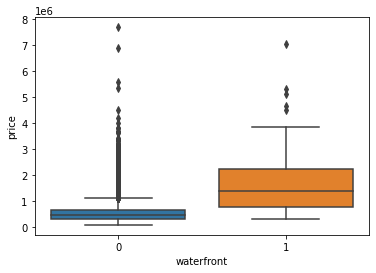

In [12]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

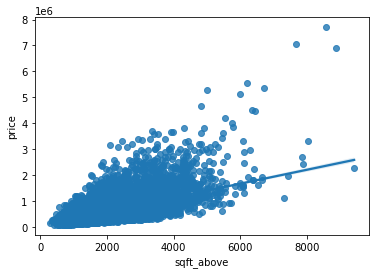

In [14]:
sns.regplot(x='sqft_above',y='price',data=df)

In [15]:
A=df[['sqft_living']]
B=df['price']
lm= LinearRegression()
lm
lm.fit(A,B)
lm.score(A,B)

0.4928532179037931

In [47]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development

In [33]:
list_of_features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lof = list_of_features
lof

['floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living']

In [52]:
list_of_features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lof = list_of_features

X = df[lof]
Y= df['price']
lm = LinearRegression()
lm
lm.fit(X, Y)
lm.score(X, Y)

0.6576930190050045

In [35]:
pl=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [36]:
pipe=Pipeline(pl)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [37]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
pipe.score(X,Y)

0.749500269827478

# Module 5: Model Evaluation and Refinement
Import the necessary modules:

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [41]:
list_of_features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
lof = list_of_features
lof

A = df[lof]
B = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [42]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6478759163939113

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pf = PolynomialFeatures(degree=2)

x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)

poly = Ridge(alpha=0.1)

poly.fit(x_train_pf, y_train)
poly.score(x_test_pf, y_test)

0.7002744253328124